#1.

#2.
Accuracy Metric measures the proportion of true results within the population, and would be useful to be used in Flu Diagnosis. It is useful as a metric especially in balanced datasets, since there are equal numbers of people who have the flu and those that don't. If the accuracy reaches 90%, it means the 90% of the predictions are correct. Accuracy is best applied on a balanced dataset because in an unbalanced dataset, it would be difficult to evaluate effectiveness of models for example if there was a rare disease that only 5% have it, a model that is poor at detecting the disease would still have a 95% accuracy.

Sensitivity measure the proportion of actual positives that are correctly identified, and is best used in cases like cancer screening, and disease diagnosis. These real life applications require extremely high sensitivity as missing a true positive and getting a false negative in turn would be life threatening. Sensitivity should be prioritized in situations that require extreme attention on catching the positive cases.

Specificity is the opposite of Sensitivity, whereas it measures the proportion of actual negatives predicted by the model. This metric is valuable in cases such as Drug approval, where false positives are more harmful than false negatives. In drug approval, a false negative would be not prescribing a powerful drug to a patient who could intake it, while a false positive would be prescibing a powerful drug to a patient who is allergic or would be seriously harmed by it. Specificity is important to prevent harm by wrongly assuming a positive.

Precision is the metric that measures how well the model identified actual true positives against false positives. This metric is applicable in situations where you need to see how precise the model is when it identifies a positive. In banking, flagging too many legitimate transactions may lead to customer dissatisfaction and additional operational costs. with a high precision, fraudulent activity is caught majority of the time while minimizing the amount of valid transactions that go through.



### Chat Summary for 1-2
Could not share original link due to not being able to share chat links that includes pictures. Replicated chat through summary.
Link to replicated Summary: https://chatgpt.com/share/673a9756-d284-8010-a64c-1f882a36a8d8
Certainly! Here's a summary of the conversation:

1. **Classification Decision Trees**:  
   - Explained how they work, their components (root node, internal nodes, leaf nodes), and key concepts like impurity measures and pruning.
   - Discussed real-world problems they solve, including customer segmentation, fraud detection, medical diagnosis, and inventory management.

2. **Real-World Applications of Metrics**:  
   - Described the use of key performance metrics (Accuracy, Sensitivity, Specificity, Precision) in various scenarios:
     - **Accuracy**: General performance measurement (e.g., balanced disease diagnosis datasets).
     - **Sensitivity**: Critical for cases where false negatives are costly (e.g., cancer screening).
     - **Specificity**: Important where false positives are disruptive (e.g., spam filters).
     - **Precision**: Vital in applications where false positives are expensive (e.g., fraud detection).

3. **Detailed Examples**:  
   - **Sensitivity**: Cancer screening prioritizes high sensitivity to detect as many positive cases as possible.  
   - **Specificity**: Spam filters aim for high specificity to avoid blocking legitimate emails.  
   - **Precision**: Fraud detection requires high precision to ensure flagged transactions are truly fraudulent.

4. **Trade-offs**:  
   - Highlighted how improving one metric often comes at the cost of another, and the choice depends on the problem's context. For instance:
     - A highly sensitive system may increase false positives.
     - A highly precise system may miss true positives.

5. **Applications in Complex Scenarios**:  
   - Example: COVID-19 testing prioritizes sensitivity to detect most infected individuals, specificity to reduce quarantines for healthy people, and precision to maintain trust in results.

Let me know if you’d like further clarification or more examples!

#3.


In [8]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

In [9]:
import pandas as pd

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Remove specified columns
ab = ab.drop(columns=['Weight_oz', 'Width', 'Height'])

# Drop rows with NaN values
ab = ab.dropna()

# Convert 'Pub year' and 'NumPages' to integers, 'Hard_or_Paper' to category
ab['Pub year'] = ab['Pub year'].astype(int)
ab['NumPages'] = ab['NumPages'].astype(int)
ab['Hard_or_Paper'] = ab['Hard_or_Paper'].astype('category')
print(ab.head())  # To display the first few rows of the cleaned dataset


                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)            Smith   
3            1421: The Year China Discovered America    Gavin Menzies   
4    1493: Uncovering the New World Columbus Created  Charles C. Mann   

   List Price  Amazon Price Hard_or_Paper  NumPages           Publisher  \
0       12.95          5.18             P       304         Adams Media   
1       15.00         10.20             P       273          Free Press   
2        1.50          1.50             P        96  Dover Publications   
3       15.99         10.87             P       672    Harper Perennial   
4       30.50         16.77             P       720               Knopf   

   Pub year     ISBN-10  Thick  
0      2010  1605506249    0.8  
1      2008  1416564195    0.7  
2      1995

#4.


In [10]:
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% testing
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(ab, test_size=0.2, random_state=42)

# Print the number of observations in both sets
print(f"Training set size: {ab_reduced_noNaN_train.shape[0]}")
print(f"Test set size: {ab_reduced_noNaN_test.shape[0]}")


Training set size: 255
Test set size: 64


[Text(0.5, 0.8333333333333334, 'List Price <= 17.97\ngini = 0.394\nsamples = 319\nvalue = [233, 86]\nclass = Paperback'),
 Text(0.25, 0.5, 'List Price <= 10.8\ngini = 0.194\nsamples = 221\nvalue = [197, 24]\nclass = Paperback'),
 Text(0.125, 0.16666666666666666, 'gini = 0.355\nsamples = 52\nvalue = [40, 12]\nclass = Paperback'),
 Text(0.375, 0.16666666666666666, 'gini = 0.132\nsamples = 169\nvalue = [157, 12]\nclass = Paperback'),
 Text(0.75, 0.5, 'List Price <= 29.225\ngini = 0.465\nsamples = 98\nvalue = [36, 62]\nclass = Hardcover'),
 Text(0.625, 0.16666666666666666, 'gini = 0.382\nsamples = 74\nvalue = [19, 55]\nclass = Hardcover'),
 Text(0.875, 0.16666666666666666, 'gini = 0.413\nsamples = 24\nvalue = [17, 7]\nclass = Paperback')]

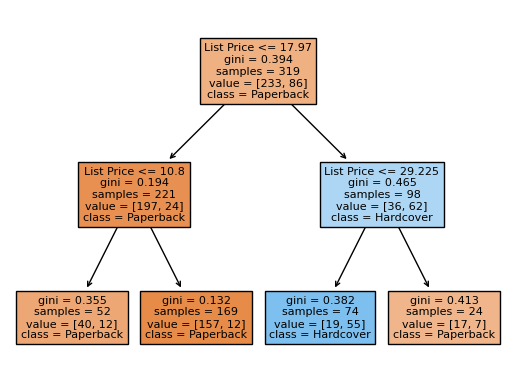

In [13]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Remove specified columns, drop rows with NaNs, and change column types
ab = ab.drop(columns=['Weight_oz', 'Width', 'Height']).dropna()
ab['Pub year'] = ab['Pub year'].astype(int)
ab['NumPages'] = ab['NumPages'].astype(int)
ab['Hard_or_Paper'] = ab['Hard_or_Paper'].astype('category')

# Define X and y
X = ab[['List Price']]
y = pd.get_dummies(ab["Hard_or_Paper"])['H']

# Train the classifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X, y)

# Plot the decision tree
plot_tree(clf, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], filled=True)


The predictions made by the fitted decision tree model depend on the splits created based on the "List Price" feature. The tree uses thresholds on "List Price" to decide whether a book is hardcover or paperback. For example:

If the "List Price" is below a certain value, the model might classify the book as paperback.
If it is above a threshold, it classifies the book as hardcover.
The exact threshold values and outcomes can be seen in the visual output of plot_tree(clf).

#5.


[Text(0.45652173913043476, 0.9, 'List Price <= 17.97\ngini = 0.394\nsamples = 319\nvalue = [233, 86]\nclass = Paperback'),
 Text(0.1956521739130435, 0.7, 'NumPages <= 82.0\ngini = 0.194\nsamples = 221\nvalue = [197, 24]\nclass = Paperback'),
 Text(0.08695652173913043, 0.5, 'Thick <= 0.25\ngini = 0.375\nsamples = 8\nvalue = [2, 6]\nclass = Hardcover'),
 Text(0.043478260869565216, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Paperback'),
 Text(0.13043478260869565, 0.3, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]\nclass = Hardcover'),
 Text(0.30434782608695654, 0.5, 'Thick <= 1.65\ngini = 0.155\nsamples = 213\nvalue = [195, 18]\nclass = Paperback'),
 Text(0.21739130434782608, 0.3, 'List Price <= 16.97\ngini = 0.148\nsamples = 211\nvalue = [194, 17]\nclass = Paperback'),
 Text(0.17391304347826086, 0.1, 'gini = 0.131\nsamples = 198\nvalue = [184, 14]\nclass = Paperback'),
 Text(0.2608695652173913, 0.1, 'gini = 0.355\nsamples = 13\nvalue = [10, 3]\nclass = Paperback'),
 Text(0.3913043

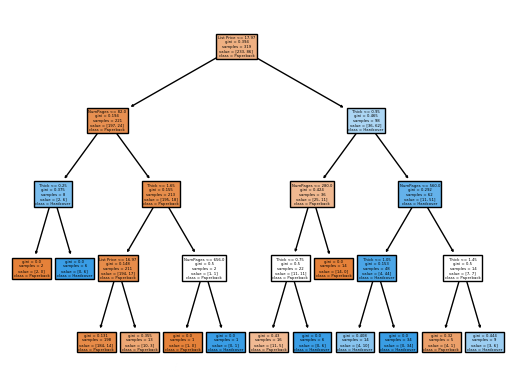

In [14]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Define X and y
X = ab[['NumPages', 'Thick', 'List Price']]  # Use selected features
y = pd.get_dummies(ab["Hard_or_Paper"])['H']  # Target variable

# Train the new decision tree classifier
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X, y)

# Plot the new decision tree
plot_tree(clf2, feature_names=['NumPages', 'Thick', 'List Price'], 
          class_names=['Paperback', 'Hardcover'], filled=True)


The tree splits the data based on thresholds for NumPages, Thick, and List Price to classify books as hardcover or paperback.
Decision-making process:
At each node, the model checks one feature (e.g., NumPages < X).
If the condition is met, it follows one branch; otherwise, it follows the other.
This process continues until the maximum depth is reached or the node is pure (all data points belong to one class).
The depth of 4 allows the tree to make up to 4 sequential decisions, capturing more complexity than the previous model.

#6.


Text(0.5, 1.0, 'Confusion Matrix for clf2')

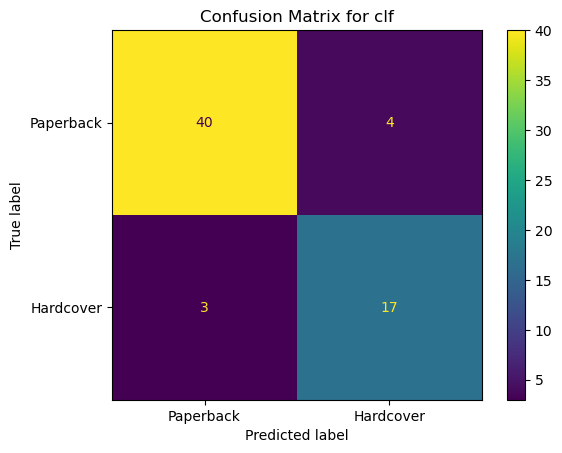

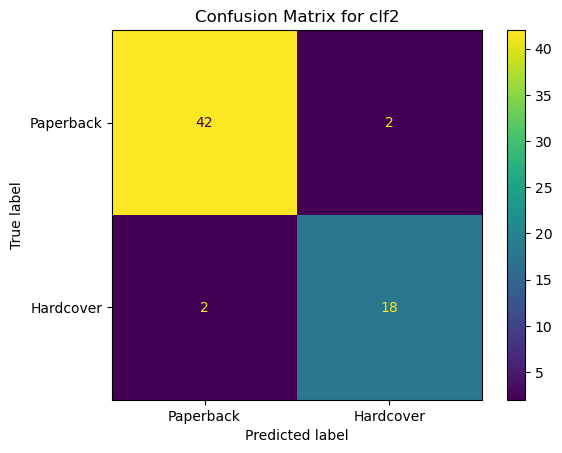

In [18]:
import matplotlib.pyplot as plt

# After importing, your code for plotting will work as intended:
disp_clf.plot()
plt.title('Confusion Matrix for clf')

disp_clf2.plot()
plt.title('Confusion Matrix for clf2')


clf - Accuracy: 0.89, Sensitivity: 0.85, Specificity: 0.91
clf2 - Accuracy: 0.94, Sensitivity: 0.90, Specificity: 0.95


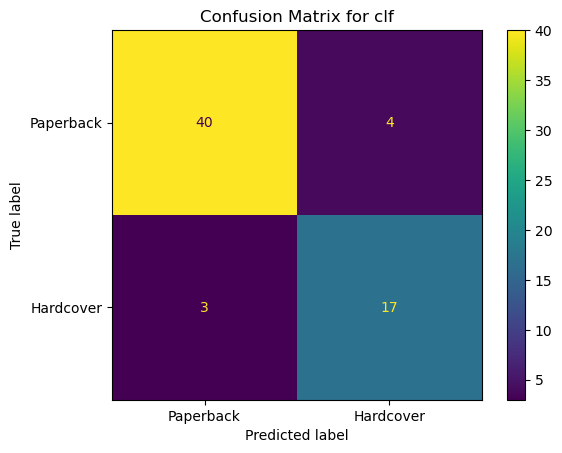

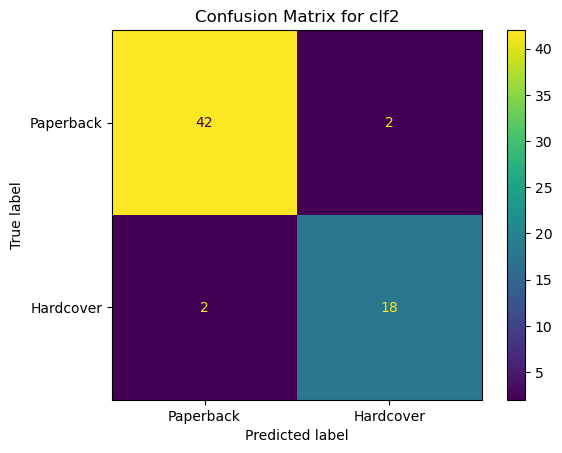

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score

# Separate features and target for the test set
X_test = ab_reduced_noNaN_test[['List Price']]  # For clf
X_test2 = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]  # For clf2
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']

# Predict using both models
y_pred_clf = clf.predict(X_test)
y_pred_clf2 = clf2.predict(X_test2)

# Confusion matrix for clf
cm_clf = confusion_matrix(y_test, y_pred_clf)
disp_clf = ConfusionMatrixDisplay(confusion_matrix=cm_clf, display_labels=['Paperback', 'Hardcover'])
disp_clf.plot()
plt.title('Confusion Matrix for clf')

# Confusion matrix for clf2
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)
disp_clf2 = ConfusionMatrixDisplay(confusion_matrix=cm_clf2, display_labels=['Paperback', 'Hardcover'])
disp_clf2.plot()
plt.title('Confusion Matrix for clf2')

# Metrics for clf
accuracy_clf = accuracy_score(y_test, y_pred_clf)
sensitivity_clf = recall_score(y_test, y_pred_clf)  # Sensitivity = Recall for the positive class
specificity_clf = cm_clf[0, 0] / (cm_clf[0, 0] + cm_clf[0, 1])  # TN / (TN + FP)

# Metrics for clf2
accuracy_clf2 = accuracy_score(y_test, y_pred_clf2)
sensitivity_clf2 = recall_score(y_test, y_pred_clf2)
specificity_clf2 = cm_clf2[0, 0] / (cm_clf2[0, 0] + cm_clf2[0, 1])

# Report metrics
print(f"clf - Accuracy: {accuracy_clf:.2f}, Sensitivity: {sensitivity_clf:.2f}, Specificity: {specificity_clf:.2f}")
print(f"clf2 - Accuracy: {accuracy_clf2:.2f}, Sensitivity: {sensitivity_clf2:.2f}, Specificity: {specificity_clf2:.2f}")


The matrices gave out these metrics:
clf - Accuracy: 0.89, Sensitivity: 0.85, Specificity: 0.91
clf2 - Accuracy: 0.94, Sensitivity: 0.90, Specificity: 0.95

#7.
The differences between the matrices, are that the number of features differ between the two and the tree's depth. clf had only a maximum depth of 2 with the list price feature, leading to a much simpler and less flexible decision boundaries. clf2 uses tools such as Numpages and Thick and List Price with maximum depth of 4, which enhances its capabilities for more complex classifications. The confusino matrices for clf2 are most likely better since the model is able to capture more patterns with its additional features and its ability to differentiate between the two types of books.

### Chat summary of 3-7
Link to conversation: https://chatgpt.com/share/673ab504-87b4-8010-85d5-20064cc80a17
In this conversation, we worked through data processing and modeling tasks using a dataset of books. We removed unnecessary columns, handled missing values, and prepared features and targets for decision tree classification. Two models were trained: one (`clf`) using only "List Price" with a max depth of 2, and another (`clf2`) using "NumPages," "Thick," and "List Price" with a max depth of 4. We evaluated both models using confusion matrices and calculated metrics like accuracy, sensitivity, and specificity, discussing how feature complexity and tree depth affected their performance.

#8.
You can use clf2.feature_importances_, which gives the importance scores for each predictor variable, to visualize feature importances for a classification decision tree in scikit-learn. The degree to which a feature influences the model's decision-making is shown by these significance scores. Furthermore, the feature names used in the model are matched by clf2.feature_names_in_.

#9.
Assuming linearity and feature independence, coefficients in linear regression models explicitly show the strength and direction of a predictor's influence on the target variable. On the other hand, feature importances in decision trees, which do not assume linearity or independence, show how much a feature contributes to lowering impurity (such as Gini or entropy) across all splits where it is used. Therefore, decision tree feature importances offer a relative measure of influence within the hierarchical structure of the model, whereas linear model coefficients can be interpreted in terms of changes in the target variable.

### Chat Summary 8-9
Link to Conversation:https://chatgpt.com/share/673ab5cc-67e0-8010-8323-ee042b317b98
In this conversation, we discussed how to visualize feature importances in a scikit-learn classification decision tree (`clf2`). We highlighted that `clf2.feature_importances_` provides the importance scores for each feature, and `clf2.feature_names_in_` corresponds to the feature names. We also shared Python code to identify and visualize the most important feature. 

Additionally, we compared the interpretation of coefficients in linear regression models to feature importances in decision trees. Linear regression coefficients represent the direct effect of predictors on the target, assuming linearity, while decision tree feature importances measure the contribution of features in reducing impurity across the tree's splits.